<a href="https://colab.research.google.com/github/Jason131sx/Reactor/blob/main/reactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaing with Pandas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl

Reading a csv file from the working directory


In [ ]:
reactors =pd.read_csv('reactors.csv')

In [ ]:
reactors.head()

,url,Name,Name_link,Country,Capacity,Status,Type,Owner,Operator,Connection
0,http://www.world-nuclear.org/information-libra...,Agesta,http://www.world-nuclear.org/reactor/default.a...,Sweden,10 MWe,PERMANENT SHUTDOWN,Pressurized Heavy Water Reactor,Barsebäck Kraft AB,Barsebäck Kraft AB,1 May 1964
1,http://www.world-nuclear.org/information-libra...,Akademik Lomonosov 1,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
2,http://www.world-nuclear.org/information-libra...,Akademik Lomonosov 2,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
3,http://www.world-nuclear.org/information-libra...,Aktau,http://www.world-nuclear.org/reactor/default.a...,Kazakhstan,52 MWe,PERMANENT SHUTDOWN,Fast Reactor,"Joint Stock Company ""National Atomic Company K...","Mangishlak Atomic Energy Complex-Kazatomprom,L...",16 July 1973
4,http://www.world-nuclear.org/information-libra...,Almaraz 1,http://www.world-nuclear.org/reactor/default.a...,Spain,1011 MWe,OPERABLE,Pressurised Water Reactor,"Iberdrola, Endesa, Gas Natural",Centrales Nucleares Almaraz-Trillo(Id/Ufg/Ende...,1 May 1981


## Displaying Basic Statistics

In [ ]:
reactors.describe()

,url,Name,Name_link,Country,Capacity,Status,Type,Owner,Operator,Connection
count,671,671,671,671,671,671,671,658,671,610
unique,1,671,671,40,321,6,12,172,158,595
top,http://www.world-nuclear.org/information-libra...,Chernobyl 4,http://www.world-nuclear.org/reactor/default.a...,United States Of America,950 MWe,OPERABLE,Pressurised Water Reactor,EDF,EDF,9 May 1984
freq,671,1,1,131,28,447,389,68,67,3


## Displaying unique values

In [ ]:
reactors['url'].unique()

array(['http://www.world-nuclear.org/information-library/facts-and-figures/reactor-database.aspx?source=%7B%22query%22%3A%7B%22match_all%22%3A%7B%7D%7D%2C%22size%22%3A%22700%22%2C%22sort%22%3A%5B%7B%22index.sort_name.exact%22%3A%7B%22order%22%3A%22asc%22%7D%7D%5D%7D'],
      dtype=object)

## Deleting Columns

In [ ]:
reactors.drop(columns = 'url', inplace = True)
reactors.head()

,Name,Name_link,Country,Capacity,Status,Type,Owner,Operator,Connection
0,Agesta,http://www.world-nuclear.org/reactor/default.a...,Sweden,10 MWe,PERMANENT SHUTDOWN,Pressurized Heavy Water Reactor,Barsebäck Kraft AB,Barsebäck Kraft AB,1 May 1964
1,Akademik Lomonosov 1,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
2,Akademik Lomonosov 2,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
3,Aktau,http://www.world-nuclear.org/reactor/default.a...,Kazakhstan,52 MWe,PERMANENT SHUTDOWN,Fast Reactor,"Joint Stock Company ""National Atomic Company K...","Mangishlak Atomic Energy Complex-Kazatomprom,L...",16 July 1973
4,Almaraz 1,http://www.world-nuclear.org/reactor/default.a...,Spain,1011 MWe,OPERABLE,Pressurised Water Reactor,"Iberdrola, Endesa, Gas Natural",Centrales Nucleares Almaraz-Trillo(Id/Ufg/Ende...,1 May 1981


## Sorting values

In [ ]:
reactors.sort_values("Connection", na_position = 'first')

,Name,Name_link,Country,Capacity,Status,Type,Owner,Operator,Connection
1,Akademik Lomonosov 1,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
2,Akademik Lomonosov 2,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
8,Angra 3,http://www.world-nuclear.org/reactor/default.a...,Brazil,1245 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Eletrobras Eletronuclear S.A.,Eletrobras Eletronuclear S.A.,NaN
23,Baltic 1,http://www.world-nuclear.org/reactor/default.a...,Russia,1109 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN
24,Barakah 1,http://www.world-nuclear.org/reactor/default.a...,United Arab Emirates,1345 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Emirates Nuclear Energy Corporation,Emirates Nuclear Energy Corporation,NaN
...,...,...,...,...,...,...,...,...,...
394,Maanshan 1,http://www.world-nuclear.org/reactor/default.a...,Taiwan,936 MWe,OPERABLE,Pressurised Water Reactor,Taiwan Power Co.,Taiwan Power Co.,9 May 1984
595,Takahama 3,http://www.world-nuclear.org/reactor/default.a...,Japan,830 MWe,OPERABLE,Pressurised Water Reactor,Kansai Electric Power Co.,Kansai Electric Power Co.,9 May 1984
323,Kalinin 1,http://www.world-nuclear.org/reactor/default.a...,Russia,950 MWe,OPERABLE,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',9 May 1984
421,Nine Mile Point 1,http://www.world-nuclear.org/reactor/default.a...,United States Of America,613 MWe,OPERABLE,Boiling Water Reactor,"Constellation Energy Nuclear Group, Llc","Exelon Generation Co., Llc",9 November 1969


## Creating another columns for the year. Extraction uses regular expression

In [ ]:
reactors['Year'] = reactors['Connection'].str.extract(r'\b(\w+)$', expand=True)

In [ ]:
reactors.head()

,Name,Name_link,Country,Capacity,Status,Type,Owner,Operator,Connection,Year
0,Agesta,http://www.world-nuclear.org/reactor/default.a...,Sweden,10 MWe,PERMANENT SHUTDOWN,Pressurized Heavy Water Reactor,Barsebäck Kraft AB,Barsebäck Kraft AB,1 May 1964,1964
1,Akademik Lomonosov 1,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN,NaN
2,Akademik Lomonosov 2,http://www.world-nuclear.org/reactor/default.a...,Russia,32 MWe,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN,NaN
3,Aktau,http://www.world-nuclear.org/reactor/default.a...,Kazakhstan,52 MWe,PERMANENT SHUTDOWN,Fast Reactor,"Joint Stock Company ""National Atomic Company K...","Mangishlak Atomic Energy Complex-Kazatomprom,L...",16 July 1973,1973
4,Almaraz 1,http://www.world-nuclear.org/reactor/default.a...,Spain,1011 MWe,OPERABLE,Pressurised Water Reactor,"Iberdrola, Endesa, Gas Natural",Centrales Nucleares Almaraz-Trillo(Id/Ufg/Ende...,1 May 1981,1981


In [ ]:
new_capacity = reactors['Capacity'].str.split(' ', n = 1, expand=True)
new_capacity

,0,1
0,10,MWe
1,32,MWe
2,32,MWe
3,52,MWe
4,1011,MWe
...,...,...
666,950,MWe
667,950,MWe
668,950,MWe
669,1040,MWe


In [ ]:
reactors['Capacity number'] = new_capacity[0]
reactors['Unit'] = new_capacity[1]
reactors.drop(columns = 'Capacity', inplace=True)
reactors.head()

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
0,Agesta,http://www.world-nuclear.org/reactor/default.a...,Sweden,PERMANENT SHUTDOWN,Pressurized Heavy Water Reactor,Barsebäck Kraft AB,Barsebäck Kraft AB,1 May 1964,1964,10,MWe
1,Akademik Lomonosov 1,http://www.world-nuclear.org/reactor/default.a...,Russia,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN,NaN,32,MWe
2,Akademik Lomonosov 2,http://www.world-nuclear.org/reactor/default.a...,Russia,UNDER CONSTRUCTION,Pressurised Water Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',NaN,NaN,32,MWe
3,Aktau,http://www.world-nuclear.org/reactor/default.a...,Kazakhstan,PERMANENT SHUTDOWN,Fast Reactor,"Joint Stock Company ""National Atomic Company K...","Mangishlak Atomic Energy Complex-Kazatomprom,L...",16 July 1973,1973,52,MWe
4,Almaraz 1,http://www.world-nuclear.org/reactor/default.a...,Spain,OPERABLE,Pressurised Water Reactor,"Iberdrola, Endesa, Gas Natural",Centrales Nucleares Almaraz-Trillo(Id/Ufg/Ende...,1 May 1981,1981,1011,MWe


In [ ]:
reactors['Capacity number'].unique()

array(['10', '32', '52', '1011', '1006', '609', '1275', '1245', '836',
       '993', '5', '376', '375', '995', '997', '340', '692', '13', '950',
       '1109', '1345', '600', '921', '904', '1310', '102', '146', '560',
       '789', '138', '365', '1167', '1240', '67', '11', 'OPERABLE', '910',
       '408', '471', '93', '17', '482', '123', '1194', '1160', '1410',
       '1101', '1104', '1105', '760', '730', '750', '817', '771', '938',
       '920', '540', '880', '915', '1164', '1136', '49', '1215', '866',
       '850', '860', '25', '1146', '1.3', '20', '650', '610', '48', '300',
       '315', '740', '925', '70', '180', '360', '905', '604', '305',
       '1500', '1495', '1065', '1064', '1107', '1218', '1207', '1045',
       '768', '890', '878', '894', '944', '1138', '1118', '55', '433',
       '1033', '206', '234', '197', '879', '601', '468', '225', '520',
       '22', '1335', '260', '1000', '1012', '874', '883', '61', '1122',
       '813', '1330', '1,6', '984', '1120', '330', '148', '439

In [ ]:
reactors['Capacity number'].str.find(',').sort_values(ascending=False)

201    1
451    1
670   -1
220   -1
227   -1
      ..
445   -1
444   -1
443   -1
442   -1
0     -1
Name: Capacity number, Length: 671, dtype: int64

In [ ]:
reactors.loc[451]

Name                                                     Olkiluoto 3
Name_link          http://www.world-nuclear.org/reactor/default.a...
Country                                                      Finland
Status                                            UNDER CONSTRUCTION
Type                                       Pressurised Water Reactor
Owner                                         Teollisuuden Voima Oyj
Operator                                      Teollisuuden Voima Oyj
Connection                                                       NaN
Year                                                             NaN
Capacity number                                                  1,6
Unit                                                             GWe
Name: 451, dtype: object

In [ ]:
reactors['Capacity number'].str.find('-').sort_values(ascending=False)

327    0
670   -1
219   -1
227   -1
226   -1
      ..
445   -1
444   -1
443   -1
442   -1
0     -1
Name: Capacity number, Length: 671, dtype: int64

In [ ]:
reactors.loc[327]

Name                                                          KANUPP
Name_link          http://www.world-nuclear.org/reactor/default.a...
Country                                                     Pakistan
Status                                                         false
Type                                 Pressurized Heavy Water Reactor
Owner                                                            NaN
Operator                                                       false
Connection                                           18 October 1971
Year                                                            1971
Capacity number                                                    -
Unit                                                             MWe
Name: 327, dtype: object

In [ ]:
reactors['Capacity number'].iloc[[201,451,327]]=reactors['Capacity number'].iloc[[201,451,327]].replace({'1,6':'1.6', '-':'0.0'})

In [ ]:
reactors['Capacity number'].iloc[[201,451,327]]

201    1.6
451    1.6
327    0.0
Name: Capacity number, dtype: object

# Correcting the line with 'Operable' in the Capacity number column

We must find the offending line

In [ ]:
reactors.loc[reactors['Capacity number']=='OPERABLE']

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
48,Bilibino 4,http://www.world-nuclear.org/reactor/default.a...,"Russia”,”11 MWe",Light Water Graphite Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',27 December 1976,NaN,NaN,OPERABLE,None


In [ ]:
reactors.loc[[48,49]]

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
48,Bilibino 4,http://www.world-nuclear.org/reactor/default.a...,"Russia”,”11 MWe",Light Water Graphite Reactor,Joint Stock Company 'Concern Rosenergoatom',Joint Stock Company 'Concern Rosenergoatom',27 December 1976,NaN,NaN,OPERABLE,None
49,Blayais 1,http://www.world-nuclear.org/reactor/default.a...,France,OPERABLE,Pressurised Water Reactor,EDF,EDF,12 June 1981,1981,910,MWe


In [ ]:
reactors.iloc[48]['Capacity number']=11

In [ ]:
reactors.iloc[48]['Country']='Russia'

In [ ]:
reactors.iloc[48]['Status']='OPERABLE'

In [ ]:
reactors.iloc[48]['Type']='Light Water Graphite Reactor'

In [ ]:
reactors.iloc[48]['Owner']='Joint Stock Company ''Concern Rosenergoatom'''

In [ ]:
reactors.iloc[48]['Operator']='Joint Stock Company ''Concern Rosenergoatom'''

In [ ]:
reactors.iloc[48]['Connection']='27 December 1976'

In [ ]:
reactors.iloc[48]['Year']='1976'

In [ ]:
reactors.iloc[48]['Unit']='MWe'

In [ ]:
reactors.loc[[48,49]]

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
48,Bilibino 4,http://www.world-nuclear.org/reactor/default.a...,Russia,OPERABLE,Light Water Graphite Reactor,Joint Stock Company Concern Rosenergoatom,Joint Stock Company Concern Rosenergoatom,27 December 1976,1976,11,MWe
49,Blayais 1,http://www.world-nuclear.org/reactor/default.a...,France,OPERABLE,Pressurised Water Reactor,EDF,EDF,12 June 1981,1981,910,MWe


## Correcting entries with different spellings

When looking at the values of Country we see that the United States appears two times, different by their spellings. We homogeneize spelling so summaries will be correct.

In [ ]:
reactors['Country'].sort_values(ascending=False).head(20)

276    United States of America
58     United States of America
279    United States of America
280    United States of America
258    United States Of America
536    United States Of America
546    United States Of America
545    United States Of America
542    United States Of America
541    United States Of America
205    United States Of America
206    United States Of America
537    United States Of America
535    United States Of America
522    United States Of America
534    United States Of America
198    United States Of America
227    United States Of America
234    United States Of America
239    United States Of America
Name: Country, dtype: object

In [ ]:
reactors.loc[[276,279,280,58],'Country'] = 'United States Of America'

In [ ]:
reactors['Country'].unique()

array(['Sweden', 'Russia', 'Kazakhstan', 'Spain', 'Brazil',
       'United States Of America', 'Armenia', 'Argentina', 'Germany',
       'United Arab Emirates', 'France', 'United Kingdom', 'Switzerland',
       'Slovakia', 'Netherlands', 'Belgium', 'Canada', 'Iran', 'Italy',
       'China', 'Romania', 'Pakistan', 'Ukraine', 'Taiwan',
       'Czech Republic', 'Japan', 'South Korea', 'Lithuania', 'India',
       'Ukriane', 'South Africa', 'Bulgaria', 'Slovenia', 'Mexico', 'USA',
       'Finland', 'Belarus', 'Hungary'], dtype=object)

In [ ]:
reactors.loc[reactors['Country']=='United States of America']

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit


In [ ]:
reactors.loc[reactors['Country']=='USA']

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
372,Lasalle 1,http://www.world-nuclear.org/reactor/default.a...,USA,OPERABLE,Boiling Water Reactor,Exelon Corporation,"Exelon Generation Co., Llc",4 September 1982,1982,1137,MWe
373,Lasalle 2,http://www.world-nuclear.org/reactor/default.a...,USA,OPERABLE,Boiling Water Reactor,Exelon Corporation,"Exelon Generation Co., Llc",20 April 1984,1984,1140,MWe


In [ ]:
reactors.loc[[372,373],'Country']='United States Of America'

In [ ]:
reactors['Country'].unique()

array(['Sweden', 'Russia', 'Kazakhstan', 'Spain', 'Brazil',
       'United States Of America', 'Armenia', 'Argentina', 'Germany',
       'United Arab Emirates', 'France', 'United Kingdom', 'Switzerland',
       'Slovakia', 'Netherlands', 'Belgium', 'Canada', 'Iran', 'Italy',
       'China', 'Romania', 'Pakistan', 'Ukraine', 'Taiwan',
       'Czech Republic', 'Japan', 'South Korea', 'Lithuania', 'India',
       'Ukriane', 'South Africa', 'Bulgaria', 'Slovenia', 'Mexico',
       'Finland', 'Belarus', 'Hungary'], dtype=object)

In [ ]:
reactors.loc[reactors['Capacity number'] == '-']

,Name,Name_link,Country,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit


## Converting GWe to MWe

Data in the dataframe are stored as strings, so we need to convert to numeric before we attempt any arithmetic.

In [ ]:
reactors['Capacity number'] = [x if y == 'MWe' else (1000.0 * pd.to_numeric(x)) for x,y in zip(reactors['Capacity number'],reactors['Unit'])]

In [ ]:
reactors['Capacity number'].iloc[[201,451,327]]

201    1600
451    1600
327     0.0
Name: Capacity number, dtype: object

In [ ]:
reactors['Country'].nunique()

37

In [ ]:
reactors_nr = reactors.groupby('Country')['Capacity number'].count().sort_values(ascending=False)[:10]
reactors_nr

Country
United States Of America    137
France                       71
Japan                        62
China                        57
Russia                       48
United Kingdom               45
Germany                      36
South Korea                  28
India                        27
Canada                       25
Name: Capacity number, dtype: int64

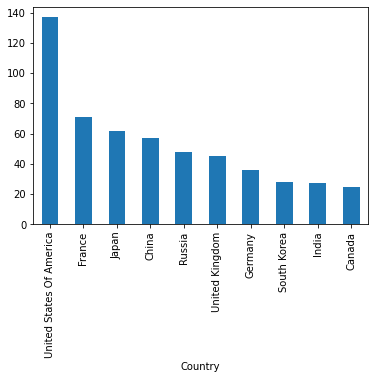

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
reactors_nr.plot(kind='bar')
plt.show()

In [ ]:
reactors.groupby('Country').count()

,Name,Name_link,Status,Type,Owner,Operator,Connection,Year,Capacity number,Unit
Country,,,,,,,,,,
Argentina,4,4,4,4,4,4,3,3,4,4
Armenia,2,2,2,2,2,2,2,2,2,2
Belarus,2,2,2,2,2,2,0,0,2,2
Belgium,8,8,8,8,8,8,8,8,8,8
Brazil,3,3,3,3,3,3,2,2,3,3
Bulgaria,6,6,6,6,4,6,6,6,6,6
Canada,25,25,25,25,25,25,25,25,25,25
China,57,57,57,57,57,57,37,37,57,57
Czech Republic,6,6,6,6,6,6,6,6,6,6
